This code is used to plot the data from the csv file of the data collected from the sensors and plot the data in a graph
both individual and combined graphs. This code expects that the data from the ADC sled on Rocksat-X is in the format as processed by RawADC2windingCurrents.py The code is written in python and uses the matplotlib, numpy and pandas libraries.

[]: # Path: src/plotData.ipynb

- Author: Nicholas Limparis
- Date: 01/26/2023
- Version: 1.0
- Python Version: 3
- Dependencies: matplotlib, numpy, pandas
 

TO Do list

- [ ] Calibration Data for the ADC, 
- [x] Calibration for the IMU
- [ ] Process the data to get the current and voltage values with the calibration data
- [ ] Plot the data in a graph
- [ ] Rotation matrix for the IM
- [ ] Isolation of the data to the section of interest




In [1]:
#Documentation variables
__author__ = 'Nicholas M Limparis'
__copyright__ = 'Copyright 2023, UMD Rocksat-X'
__credits__ = ['Nicholas M Limparis']
__license__ = '{MIT}'
__maintainer__ = 'Nicholas M Limparis'
__email__ = 'nicholas@github.limpar.is'
__status__ = 'Dev'

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.markers as mmarkers
import os
import sys

#Which data to plot
dataSet = "Data65"

In [2]:
# Here we open the files and load the data into a pandas dataframe

# Open the file for reading
#Check to see if the file exists
inputFileNameADC = "../outputData/" + dataSet + "_ADCCurrentReadings.dat"
if not os.path.isfile(inputFileNameADC): 
    sys.exit("The input file given is not a file")   
else:
    #dataFileNameList = inputFileName.split(os.sep)        #
    #dataFileNameSplit = dataFileNameList[len(dataFileNameList)-1].split(".") # This gives us the final part of the data filename string
    #dataFileName = dataFileNameSplit[0]
    pass

# We have verified that the file exists
# Now we can open it Lets start with the current data
# We will use the pandas read_csv function to read in the data

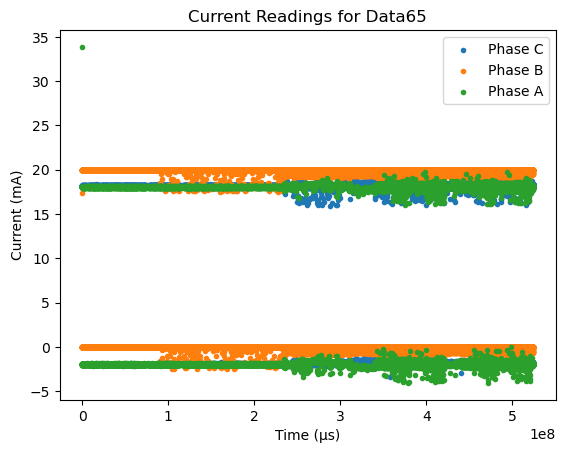

In [3]:
# Now we need to parse the current data into a pandas dataframe from inputLines
# We will use the first line as the column headers
# There are 4 Data chunks in the file separated by commas
# 1. Time stamp in ms
# 2. Current in mA of phase A
# 3. Current in mA of phase B
# 4. Current in mA of phase C


#now we need to parse the data into a pandas dataframe from the csv file
adcData = pd.read_csv(inputFileNameADC, header=0, names=['Time', 'PhaseA', 'PhaseB', 'PhaseC'])

# Now we need to plot the data
# We will plot the data in a 3x1 subplot
# The first subplot will be the current of phase A
# The second subplot will be the current of phase B
# The third subplot will be the current of phase C
#plt.scatter(adcData['Time'], adcData['PhaseA'], label='Phase A')
#plt.scatter(adcData['Time'], adcData['PhaseB'], label='Phase B')
fig, ax = plt.subplots()


ax.scatter(adcData['Time'], adcData['PhaseC'], label='Phase C', marker=".")
ax.scatter(adcData['Time'], adcData['PhaseB'], label='Phase B', marker=".")
ax.scatter(adcData['Time'], adcData['PhaseA'], label='Phase A', marker=".")


ax.set_xlabel('Time (µs)')
ax.set_ylabel('Current (mA)')
ax.set_title('Current Readings for ' + dataSet)
ax.legend()


The experiment time is 524101034 µs
The experiment time is 524.101034 s
The total number of data points is 80581
The average time between data points is 6504.027425819982 us
The average frequency of the data points is 153.7508891844697 Hz


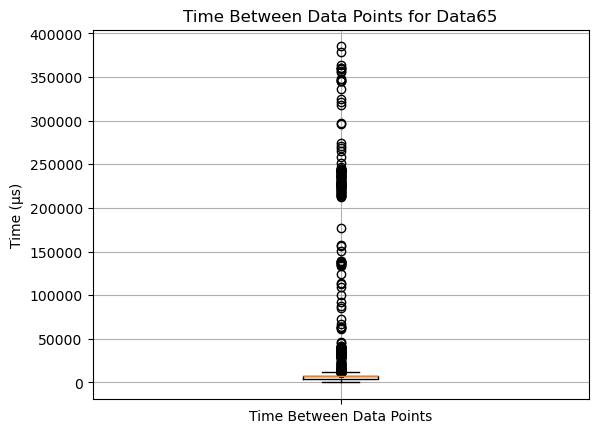

The minimum time between data points is 0.0 µs
The maximum time between data points is 384991.0 µs
The standard deviation of the time between data points is 10334.978213920866 µs
The mean of the time between data points is 6503.94125165982 µs


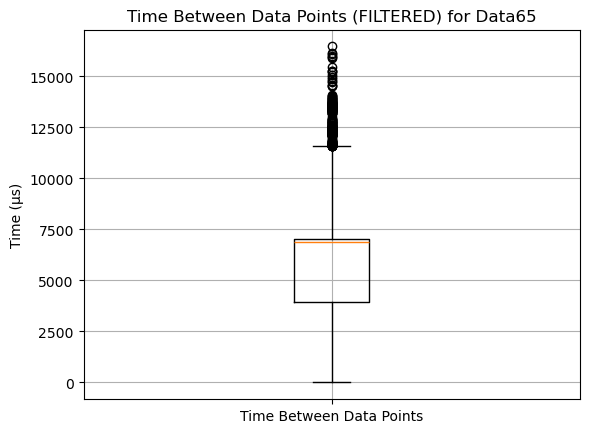

In [5]:
# This is a quick calculation to get some human readable numbers
# we will figure out the time between the first and last data point in seconds
# We will then calculate the average values for each ADC bit change in output values for each data type
# all of the ADCs for the IMU are 16 bit ADCs and the ADCs for the current sensors are 14 bit ADCs

# First we need to get the time between the first and last data point
# We will use the first and last time stamp in the data set
# We will then convert the time stamp to seconds

experimentTime = adcData['Time'].iloc[-1] - adcData['Time'].iloc[0]
experimentTimeSec = experimentTime / 1000000
print("The experiment time is " + str(experimentTime) + " µs")
print("The experiment time is " + str(experimentTimeSec) + " s")
# How many total data points are there
totalDataPoints = len(adcData.index)
print("The total number of data points is " + str(totalDataPoints))
# What is the average time between data points
averageTimeBetweenDataPoints = experimentTime / totalDataPoints
print("The average time between data points is " + str(averageTimeBetweenDataPoints) + " us")
# What is the frequency of the data points in Hz
# We will calculate the frequency of the data points by taking the inverse of the average time between data points
# We will then calculate the standard deviation of the frequency of the data points

# What is the average frequency of the data points
adcAverageFrequency = 1 / (averageTimeBetweenDataPoints / 1000000)
print("The average frequency of the data points is " + str(adcAverageFrequency) + " Hz")


# What is the deviation in time between data points
# We will increment through the data set and calculate the time between each data point
# We will then calculate the standard deviation of the time between data points
# We will then calculate the average time between data points

# We will then calculate the average frequency of the data points


timeBetweenDataPoints = np.zeros(totalDataPoints)
for i in range(1, len(adcData['Time'])-1):
    if i == 0:
        timeBetweenDataPoints[i] = adcData['Time'].iloc[i+1] - adcData['Time'].iloc[i]
    elif i == totalDataPoints - 1:
        pass
    elif i == totalDataPoints:
        pass
    else:
        timeBetweenDataPoints[i] = adcData['Time'].iloc[i] - adcData['Time'].iloc[i-1]
    
#Now lets plot a box and whisker plot of the time between data points
fig, ax = plt.subplots()
ax.boxplot(timeBetweenDataPoints)
ax.set_ylabel('Time (µs)')
ax.set_title('Time Between Data Points for ' + dataSet)
ax.set_xticklabels(['Time Between Data Points'])
ax.grid(True)
plt.show()

#Now lets find the minimum and maximum time between data points
minTimeBetweenDataPoints = np.amin(timeBetweenDataPoints)
maxTimeBetweenDataPoints = np.amax(timeBetweenDataPoints)
print("The minimum time between data points is " + str(minTimeBetweenDataPoints) + " µs")
print("The maximum time between data points is " + str(maxTimeBetweenDataPoints) + " µs")

#now lets remove all of the data points that are greater than 1 standard deviations from the mean

#now lets calculate the standard deviation of the time between data points
timeBetweenDataPointsStd = np.std(timeBetweenDataPoints)
print("The standard deviation of the time between data points is " + str(timeBetweenDataPointsStd) + " µs")

#now lets calculate the mean of the time between data points
timeBetweenDataPointsMean = np.mean(timeBetweenDataPoints)
print("The mean of the time between data points is " + str(timeBetweenDataPointsMean) + " µs")

#Now lets remove all of the data points that are greater than 2 standard deviations from the mean
timeBetweenDataPointsClean = []
for i in range(0, len(timeBetweenDataPoints)):
    if timeBetweenDataPoints[i] < timeBetweenDataPointsMean + 1 * timeBetweenDataPointsStd:
        timeBetweenDataPointsClean.append(timeBetweenDataPoints[i])
    else:
        pass

#Now lets plot a box and whisker plot of the time between data points for the filtered data
figFilteredTimeDataADC, axFilteredTimeDataADC = plt.subplots()
axFilteredTimeDataADC.boxplot(timeBetweenDataPointsClean)
axFilteredTimeDataADC.set_ylabel('Time (µs)')
axFilteredTimeDataADC.set_title('Time Between Data Points (FILTERED) for ' + dataSet)
axFilteredTimeDataADC.set_xticklabels(['Time Between Data Points'])
axFilteredTimeDataADC.grid(True)
plt.show()




#Now we need to calculate the change per bit for each data type

#Current data
#The current data is 14 bit ADCs
#The ADCs are 0 to 3.3V
#The ADCs are 0 to 16384
#The ADCs are 0 to 3.3/16384 = 0.0002 V/bit 
#The ADCs are 0 to 3.3/16384 * 1000 = 0.2 mV/bit
#The ADCs are 0 to 3.3/16384 * 1000 * 1000 = 200 uV/bit
#The ADCs are 0 to 3.3/16384 * 1000 * 1000 * 10 Amps/3.3V = 60.6 uA/bit



Ok so here we have to look a the body frames asocciated with the two systems here. We have the rocket frame and the IMU frame for the MPU-9250 from InvaSense. We start with a standard rotation matrix

$

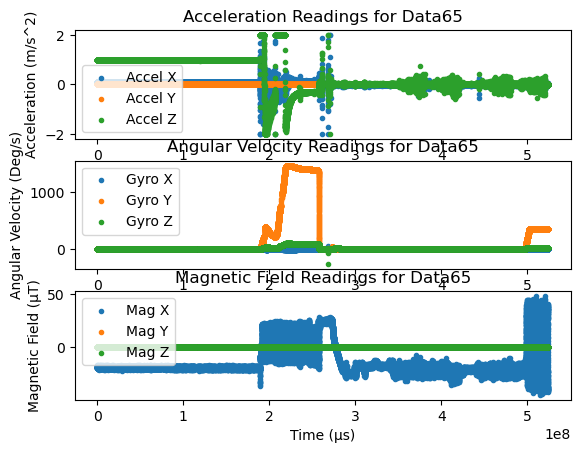

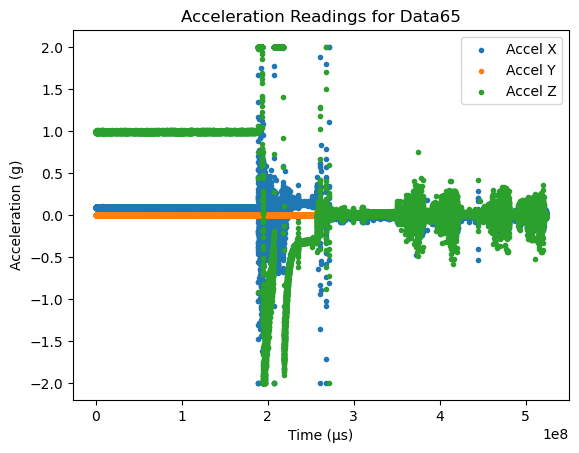

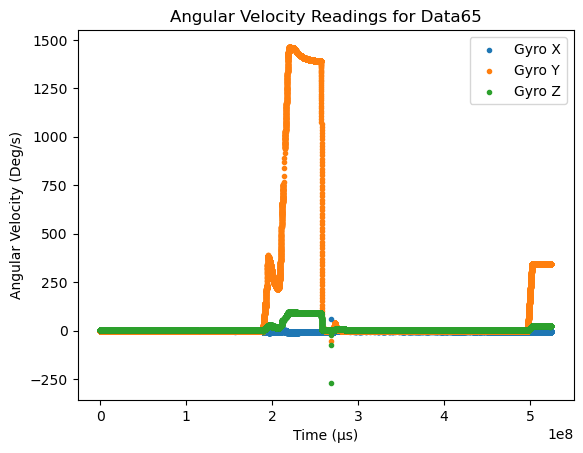

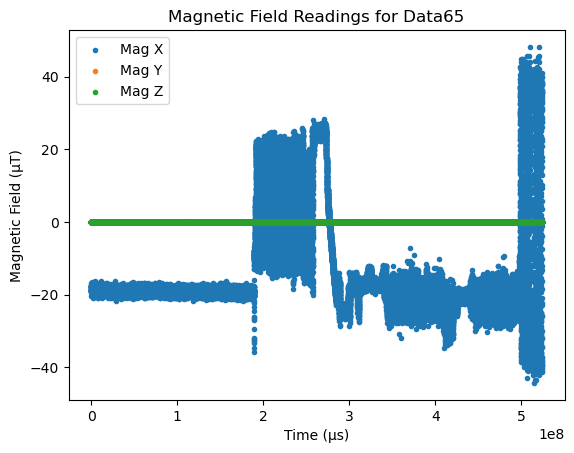

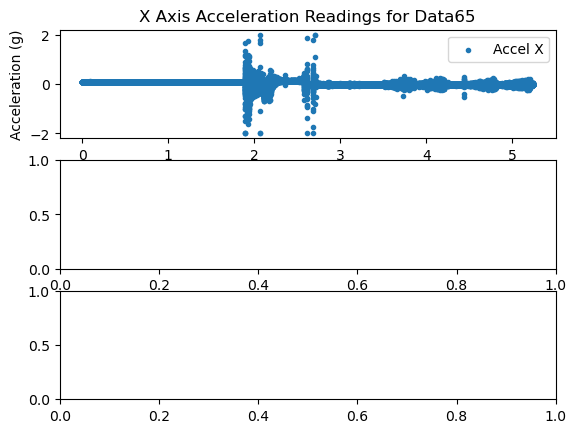

In [6]:
#Now we need to process the IMU data
#We will open the file and read it into a pandas dataframe
#We will then plot the data in a 3x1 subplot with the first subplot being the acceleration
#The second subplot being the angular velocity
#The third subplot being the magnetic field/magnetometer data

#First we need to open the file and read it into a pandas dataframe
imuData = pd.read_csv("../outputData/" + dataSet + "_IMUReadings.dat", header=0, names=['Time', 'AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ'])

#The data is loaded and now we need to plot it
figIMU, axIMU = plt.subplots(ncols=1,nrows=3)   # Create a figure containing a single axes.

axIMU[0].scatter(imuData['Time'], imuData['AccelX'], label='Accel X', marker=".")
axIMU[0].scatter(imuData['Time'], imuData['AccelY'], label='Accel Y', marker=".")
axIMU[0].scatter(imuData['Time'], imuData['AccelZ'], label='Accel Z', marker=".") 
axIMU[0].set_xlabel('Time (µs)')
axIMU[0].set_ylabel('Acceleration (m/s^2)')
axIMU[0].set_title('Acceleration Readings for ' + dataSet)
axIMU[0].legend()

axIMU[1].scatter(imuData['Time'], imuData['GyroX'], label='Gyro X', marker=".")
axIMU[1].scatter(imuData['Time'], imuData['GyroY'], label='Gyro Y', marker=".")
axIMU[1].scatter(imuData['Time'], imuData['GyroZ'], label='Gyro Z', marker=".")
axIMU[1].set_xlabel('Time (µs)')
axIMU[1].set_ylabel('Angular Velocity (Deg/s)')
axIMU[1].set_title('Angular Velocity Readings for ' + dataSet)
axIMU[1].legend()

axIMU[2].scatter(imuData['Time'], imuData['MagX'], label='Mag X', marker=".")
axIMU[2].scatter(imuData['Time'], imuData['MagY'], label='Mag Y', marker=".")
axIMU[2].scatter(imuData['Time'], imuData['MagZ'], label='Mag Z', marker=".")
axIMU[2].set_xlabel('Time (µs)')
axIMU[2].set_ylabel('Magnetic Field (µT)')
axIMU[2].set_title('Magnetic Field Readings for ' + dataSet)
axIMU[2].legend()

#Now will plot the data as seperate plots

figIMUAccel, axIMUAccel = plt.subplots()   # Create a figure containing a single axes.
figIMUGyro, axIMUGyro = plt.subplots()   # Create a figure containing a single axes.
figIMUMag, axIMUMag = plt.subplots()   # Create a figure containing a single axes.


axIMUAccel.scatter(imuData['Time'], imuData['AccelX'], label='Accel X', marker=".")
axIMUAccel.scatter(imuData['Time'], imuData['AccelY'], label='Accel Y', marker=".")
axIMUAccel.scatter(imuData['Time'], imuData['AccelZ'], label='Accel Z', marker=".")
axIMUAccel.set_xlabel('Time (µs)')
axIMUAccel.set_ylabel('Acceleration (g)')
axIMUAccel.set_title('Acceleration Readings for ' + dataSet)
axIMUAccel.legend()

axIMUGyro.scatter(imuData['Time'], imuData['GyroX'], label='Gyro X', marker=".")
axIMUGyro.scatter(imuData['Time'], imuData['GyroY'], label='Gyro Y', marker=".")
axIMUGyro.scatter(imuData['Time'], imuData['GyroZ'], label='Gyro Z', marker=".")
axIMUGyro.set_xlabel('Time (µs)')
axIMUGyro.set_ylabel('Angular Velocity (Deg/s)')
axIMUGyro.set_title('Angular Velocity Readings for ' + dataSet)
axIMUGyro.legend()

axIMUMag.scatter(imuData['Time'], imuData['MagX'], label='Mag X', marker=".")
axIMUMag.scatter(imuData['Time'], imuData['MagY'], label='Mag Y', marker=".")
axIMUMag.scatter(imuData['Time'], imuData['MagZ'], label='Mag Z', marker=".")
axIMUMag.set_xlabel('Time (µs)')
axIMUMag.set_ylabel('Magnetic Field (µT)')
axIMUMag.set_title('Magnetic Field Readings for ' + dataSet)
axIMUMag.legend()

#Ok lets plot the data as a 3x1 subplot for each of the 
figIMUAccelSep, axIMUAccelSep = plt.subplots(ncols=1,nrows=3)   # Create a figure containing a single axes.

axIMUAccelSep[0].scatter(imuData['Time'], imuData['AccelX'], label='Accel X', marker=".")
axIMUAccelSep[0].set_xlabel('Time (µs)')
axIMUAccelSep[0].set_ylabel('Acceleration (g)')
axIMUAccelSep[0].set_title('X Axis Acceleration Readings for ' + dataSet)
axIMUAccelSep[0].legend()


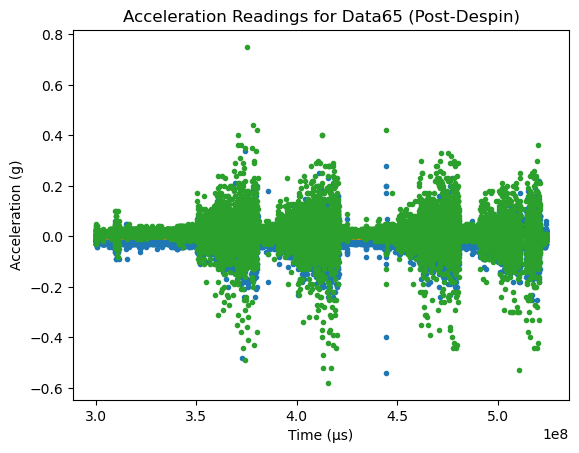

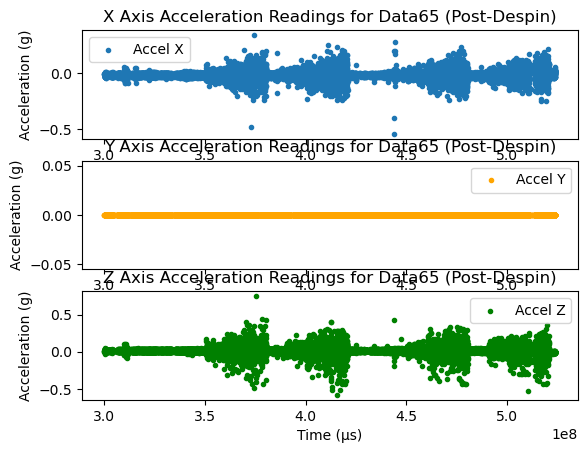

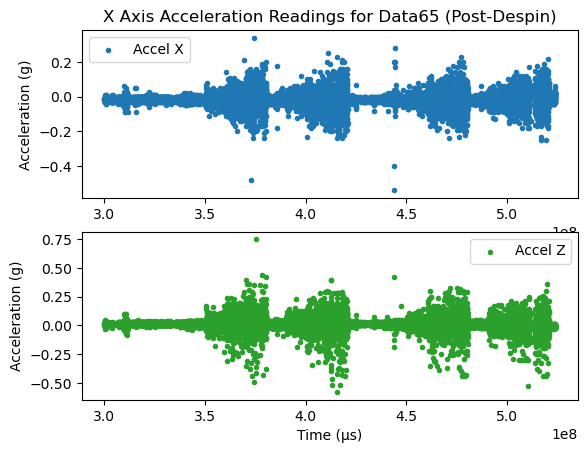

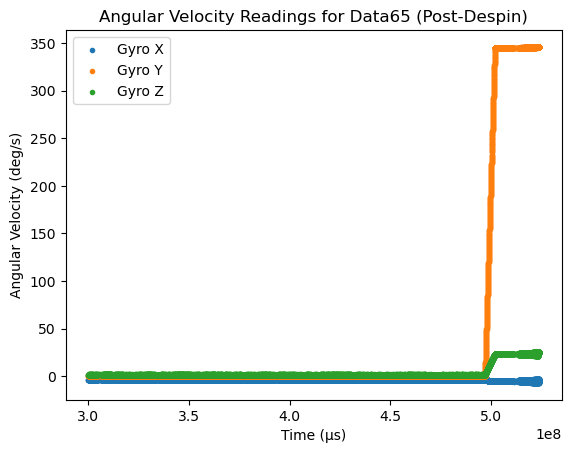

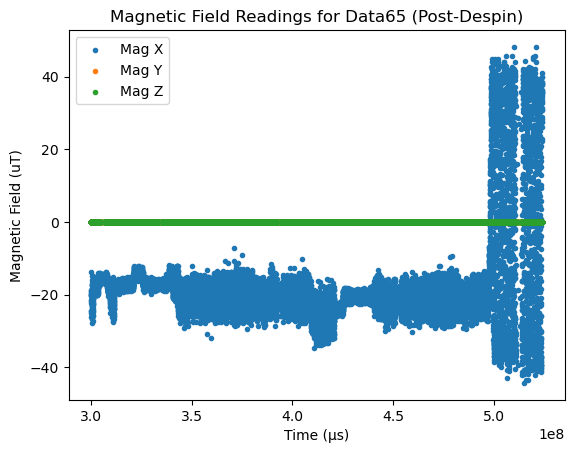

In [7]:
####
# Ok so now we need to zoom in on the section of data of interest
# The system despin looks to be at about complete at about 3e8 ms from the start of the data
# So we will zoom in on that section of data

# First we need to find the index of the data that is closest to 3e8 ms
indexDespin = 0
for i in range(0, len(imuData['Time'])):
    if imuData['Time'][i] >= 3e8:
        indexDespin = i
        break

# Now we will create a new dataframe that is just the data from the despin onwards
imuDataDespin = imuData[indexDespin:]

# Now we will plot the data
figIMUAccelDespin, axIMUAccelDespin = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelDespin = axIMUAccelDespin.scatter(imuDataDespin['Time'], imuDataDespin['AccelX'], label='Accel X', marker=".")
plotIMUAccelDespin = axIMUAccelDespin.scatter(imuDataDespin['Time'], imuDataDespin['AccelY'], label='Accel Y', marker=".")
plotIMUAccelDespin = axIMUAccelDespin.scatter(imuDataDespin['Time'], imuDataDespin['AccelZ'], label='Accel Z', marker=".")
#add axis titles
axIMUAccelDespin.set_xlabel('Time (µs)')
axIMUAccelDespin.set_ylabel('Acceleration (g)')
axIMUAccelDespin.set_title('Acceleration Readings for ' + dataSet + ' (Post-Despin)')

#Ok lets plot the data as a 3x1 subplot for each of the 
figIMUAccelSepDespin, axIMUAccelSepDespin = plt.subplots(ncols=1,nrows=3)   # Create a figure containing a single axes.

axIMUAccelSepDespin[0].scatter(imuDataDespin['Time'], imuDataDespin['AccelX'], label='Accel X', marker=".")
axIMUAccelSepDespin[0].set_xlabel('Time (µs)')
axIMUAccelSepDespin[0].set_ylabel('Acceleration (g)')
axIMUAccelSepDespin[0].set_title('X Axis Acceleration Readings for ' + dataSet + ' (Post-Despin)')
axIMUAccelSepDespin[0].legend()

axIMUAccelSepDespin[1].scatter(imuDataDespin['Time'], imuDataDespin['AccelY'], label='Accel Y', marker=".", color='orange')
axIMUAccelSepDespin[1].set_xlabel('Time (µs)')
axIMUAccelSepDespin[1].set_ylabel('Acceleration (g)')
axIMUAccelSepDespin[1].set_title('Y Axis Acceleration Readings for ' + dataSet + ' (Post-Despin)')
axIMUAccelSepDespin[1].legend()

axIMUAccelSepDespin[2].scatter(imuDataDespin['Time'], imuDataDespin['AccelZ'], label='Accel Z', marker=".", color='green')
axIMUAccelSepDespin[2].set_xlabel('Time (µs)')
axIMUAccelSepDespin[2].set_ylabel('Acceleration (g)')
axIMUAccelSepDespin[2].set_title('Z Axis Acceleration Readings for ' + dataSet + ' (Post-Despin)')
axIMUAccelSepDespin[2].legend()

#Ok lets plot the data as a 2x1 subplot for the two axis we are interested in
figIMUAccelSepDespinXZ, axIMUAccelSepDespinXZ = plt.subplots(ncols=1,nrows=2)   # Create a figure containing a single axes.

axIMUAccelSepDespinXZ[0].scatter(imuDataDespin['Time'], imuDataDespin['AccelX'], label='Accel X', marker=".")
#axIMUAccelSepDespinXZ[0].set_xlabel('Time (µs)')
axIMUAccelSepDespinXZ[0].set_ylabel('Acceleration (g)')
axIMUAccelSepDespinXZ[0].set_title('X Axis Acceleration Readings for ' + dataSet + ' (Post-Despin)')
axIMUAccelSepDespinXZ[0].legend()

axIMUAccelSepDespinXZ[1].scatter(imuDataDespin['Time'], imuDataDespin['AccelZ'], label='Accel Z', marker=".", color='tab:green')
axIMUAccelSepDespinXZ[1].set_xlabel('Time (µs)')
axIMUAccelSepDespinXZ[1].set_ylabel('Acceleration (g)')
#axIMUAccelSepDespinXZ[1].set_title('Z Axis Acceleration Readings for ' + dataSet + ' (Post-Despin)')
axIMUAccelSepDespinXZ[1].legend()


#Gyro Data
figIMUGyroDespin, axIMUGyroDespin = plt.subplots()   # Create a figure containing a single axes.
plotIMUGyroDespin = axIMUGyroDespin.scatter(imuDataDespin['Time'], imuDataDespin['GyroX'], label='Gyro X', marker=".")
plotIMUGyroDespin = axIMUGyroDespin.scatter(imuDataDespin['Time'], imuDataDespin['GyroY'], label='Gyro Y', marker=".")
plotIMUGyroDespin = axIMUGyroDespin.scatter(imuDataDespin['Time'], imuDataDespin['GyroZ'], label='Gyro Z', marker=".")
#add axis titles
axIMUGyroDespin.set_xlabel('Time (µs)')
axIMUGyroDespin.set_ylabel('Angular Velocity (deg/s)')
axIMUGyroDespin.set_title('Angular Velocity Readings for ' + dataSet + ' (Post-Despin)')
axIMUGyroDespin.legend()

figIMUMagDespin, axIMUMagDespin = plt.subplots()   # Create a figure containing a single axes.
plotIMUMagDespin = axIMUMagDespin.scatter(imuDataDespin['Time'], imuDataDespin['MagX'], label='Mag X', marker=".")
plotIMUMagDespin = axIMUMagDespin.scatter(imuDataDespin['Time'], imuDataDespin['MagY'], label='Mag Y', marker=".")
plotIMUMagDespin = axIMUMagDespin.scatter(imuDataDespin['Time'], imuDataDespin['MagZ'], label='Mag Z', marker=".")
#add axis titles
axIMUMagDespin.set_xlabel('Time (µs)')
axIMUMagDespin.set_ylabel('Magnetic Field (uT)')
axIMUMagDespin.set_title('Magnetic Field Readings for ' + dataSet + ' (Post-Despin)')
axIMUMagDespin.legend()




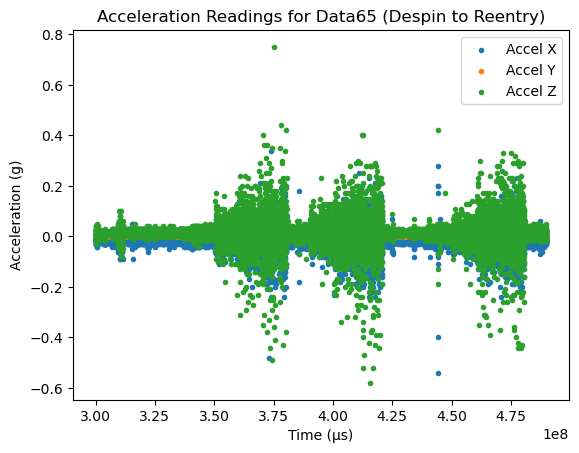

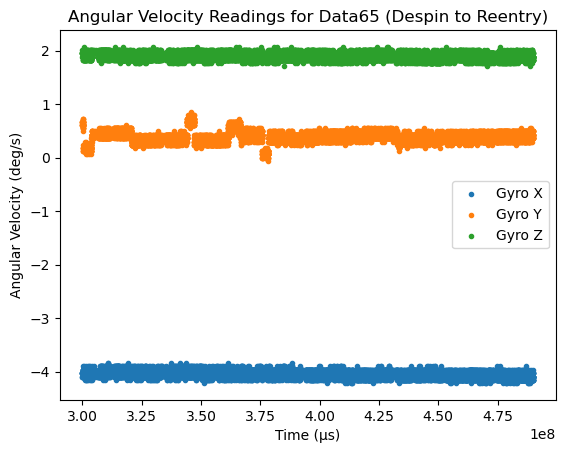

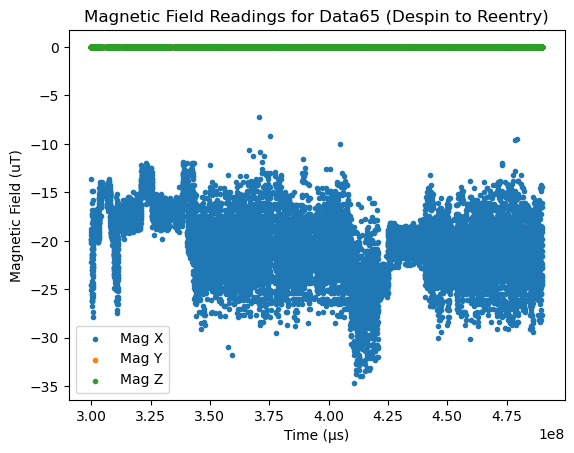

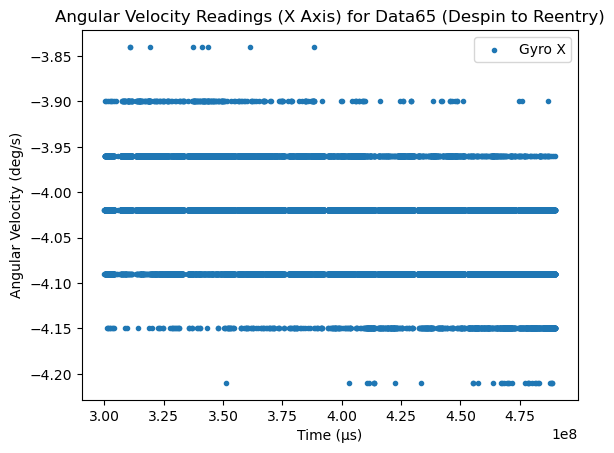

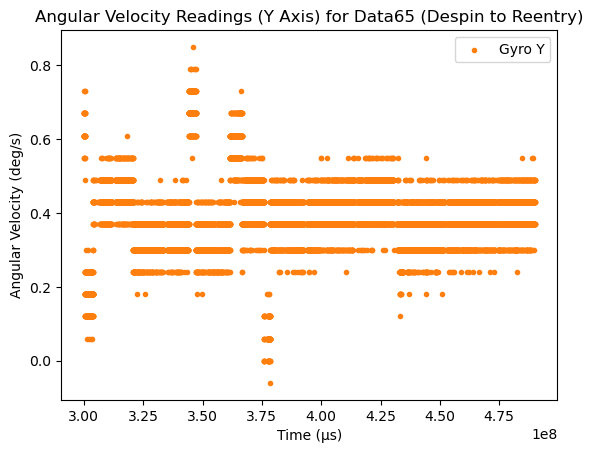

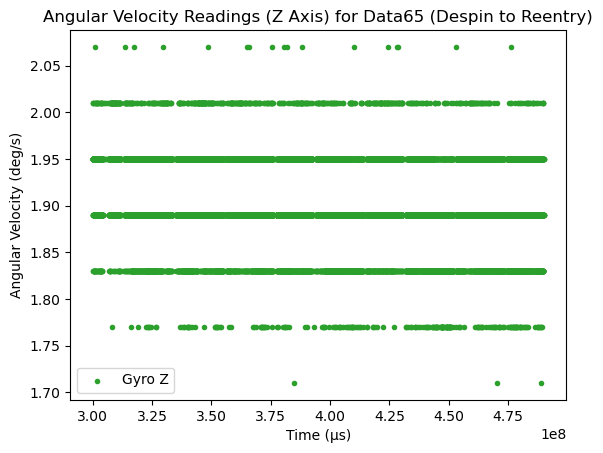

In [8]:
#Ok so now we need to zoom in on the section of data of interest for the IMU data
# Reentry looks to be at about complete at about 4.9e8 ms from the start of the data
# So we will zoom in on that section of data

# First we need to find the index of the data that is closest to 4.9e8 ms
indexReentry = 0
for i in range(0, len(imuData['Time'])):
    if imuData['Time'][i] >= 4.9e8:
        indexReentry = i
        break

# Now we will create a new dataframe that is just the data from indexDespin to indexReentry

imuDataReentry = imuData[indexDespin:indexReentry]

# Now we will plot the data
figIMUAccelReentry, axIMUAccelReentry = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelReentry = axIMUAccelReentry.scatter(imuDataReentry['Time'], imuDataReentry['AccelX'], label='Accel X', marker=".")
plotIMUAccelReentry = axIMUAccelReentry.scatter(imuDataReentry['Time'], imuDataReentry['AccelY'], label='Accel Y', marker=".")
plotIMUAccelReentry = axIMUAccelReentry.scatter(imuDataReentry['Time'], imuDataReentry['AccelZ'], label='Accel Z', marker=".")
#add axis titles
axIMUAccelReentry.set_xlabel('Time (µs)')
axIMUAccelReentry.set_ylabel('Acceleration (g)')
axIMUAccelReentry.set_title('Acceleration Readings for ' + dataSet + ' (Despin to Reentry)')
axIMUAccelReentry.legend()

figIMUGyroReentry, axIMUGyroReentry = plt.subplots()   # Create a figure containing a single axes.
plotIMUGyroReentry = axIMUGyroReentry.scatter(imuDataReentry['Time'], imuDataReentry['GyroX'], label='Gyro X', marker=".")
plotIMUGyroReentry = axIMUGyroReentry.scatter(imuDataReentry['Time'], imuDataReentry['GyroY'], label='Gyro Y', marker=".")
plotIMUGyroReentry = axIMUGyroReentry.scatter(imuDataReentry['Time'], imuDataReentry['GyroZ'], label='Gyro Z', marker=".")
#add axis titles
axIMUGyroReentry.set_xlabel('Time (µs)')
axIMUGyroReentry.set_ylabel('Angular Velocity (deg/s)')
axIMUGyroReentry.set_title('Angular Velocity Readings for ' + dataSet + ' (Despin to Reentry)')
axIMUGyroReentry.legend()

figIMUMagReentry, axIMUMagReentry = plt.subplots()   # Create a figure containing a single axes.
plotIMUMagReentry = axIMUMagReentry.scatter(imuDataReentry['Time'], imuDataReentry['MagX'], label='Mag X', marker=".")
plotIMUMagReentry = axIMUMagReentry.scatter(imuDataReentry['Time'], imuDataReentry['MagY'], label='Mag Y', marker=".")
plotIMUMagReentry = axIMUMagReentry.scatter(imuDataReentry['Time'], imuDataReentry['MagZ'], label='Mag Z', marker=".")
#add axis titles
axIMUMagReentry.set_xlabel('Time (µs)')
axIMUMagReentry.set_ylabel('Magnetic Field (uT)')
axIMUMagReentry.set_title('Magnetic Field Readings for ' + dataSet + ' (Despin to Reentry)')
axIMUMagReentry.legend()

# Lets look at the gyro data in more detail for each axis individually
figIMUGyroXReentry, axIMUGyroXReentry = plt.subplots()   # Create a figure containing a single axes.
plotIMUGyroXReentry = axIMUGyroXReentry.scatter(imuDataReentry['Time'], imuDataReentry['GyroX'], label='Gyro X', marker=".")
#add axis titles
axIMUGyroXReentry.set_xlabel('Time (µs)')
axIMUGyroXReentry.set_ylabel('Angular Velocity (deg/s)')
axIMUGyroXReentry.set_title('Angular Velocity Readings (X Axis) for ' + dataSet + ' (Despin to Reentry)')
axIMUGyroXReentry.legend()

figIMUGyroYReentry, axIMUGyroYReentry = plt.subplots()   # Create a figure containing a single axes and set the color to yellow.
plotIMUGyroYReentry = axIMUGyroYReentry.scatter(imuDataReentry['Time'], imuDataReentry['GyroY'], label='Gyro Y', marker=".", color='tab:orange')
#add axis titles
axIMUGyroYReentry.set_xlabel('Time (µs)')
axIMUGyroYReentry.set_ylabel('Angular Velocity (deg/s)')
axIMUGyroYReentry.set_title('Angular Velocity Readings (Y Axis) for ' + dataSet + ' (Despin to Reentry)')
axIMUGyroYReentry.legend()

figIMUGyroZReentry, axIMUGyroZReentry = plt.subplots()   # Create a figure containing a single axes.
plotIMUGyroZReentry = axIMUGyroZReentry.scatter(imuDataReentry['Time'], imuDataReentry['GyroZ'], label='Gyro Z', marker=".", color='tab:green')
#add axis titles
axIMUGyroZReentry.set_xlabel('Time (µs)')
axIMUGyroZReentry.set_ylabel('Angular Velocity (deg/s)')
axIMUGyroZReentry.set_title('Angular Velocity Readings (Z Axis) for ' + dataSet + ' (Despin to Reentry)')
axIMUGyroZReentry.legend()



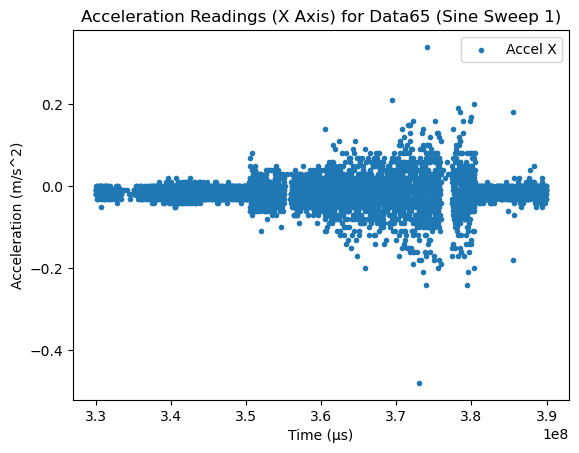

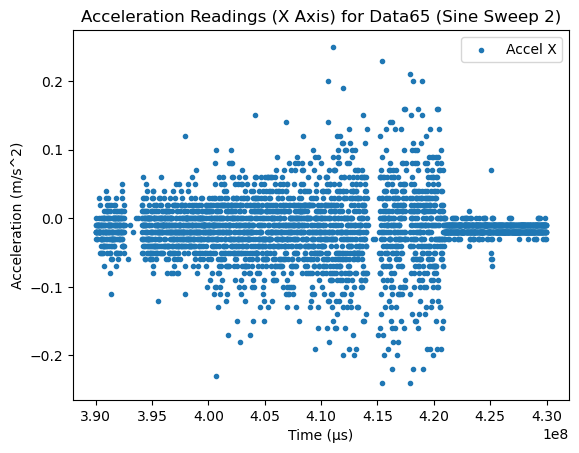

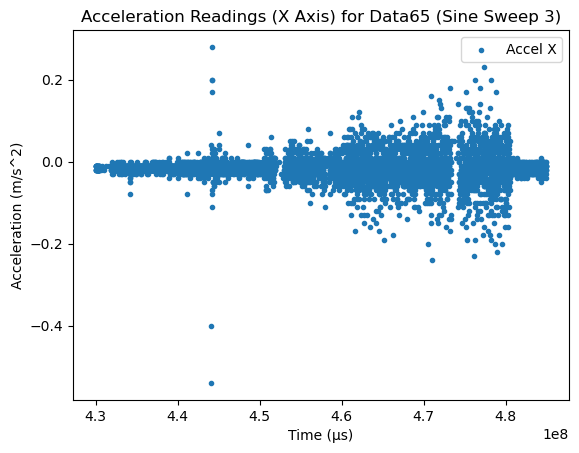

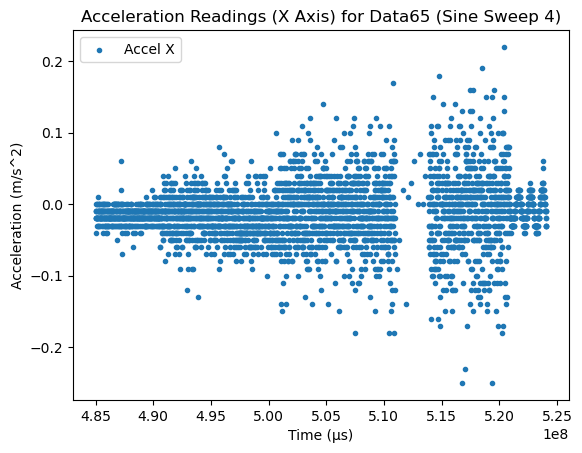

In [9]:
#Coolbeans we have some data to work with now
# Lets look at the accel data first
# We will start by looking at the accel data in the x direction
# We will use the data from the first sine sweep to start with
# That will require us to look at the set of data from 3.3e8 to 3.9e8 ms
# We will also need to find the index of the data that is closest to 3.3e8 ms
indexSineSweep1Start = 0
for i in range(0, len(imuData['Time'])):
    if imuData['Time'][i] >= 3.3e8:
        indexSineSweep1Start = i
        break

# we will also need to find the index of the data that is closest to 3.9e8 ms
indexSineSweep1End = 0
for i in range(indexSineSweep1Start, len(imuData['Time'])):
    if imuData['Time'][i] >= 3.9e8:
        indexSineSweep1End = i
        break

# Now we will create a new dataframe that is just the data from indexSineSweep1Start to indexSineSweep1End
imuDataSineSweep1 = imuData[indexSineSweep1Start:indexSineSweep1End]

# Since we are already breaking apart the data into sine sweeps lets go ahead and do that for all of the sine sweeps
# We will start by finding the start and end indices for each sine sweep and then creating a new dataframe for each
# sine sweep 2 starts at the same time as a the end of sine sweep 1 and ends 4.3e8 ms
indexSineSweep2Start = indexSineSweep1End

indexSineSweep2End = 0
for i in range(indexSineSweep2Start, len(imuData['Time'])):
    if imuData['Time'][i] >= 4.3e8:
        indexSineSweep2End = i
        break

# Now we will create a new dataframe that is just the data from indexSineSweep2Start to indexSineSweep2End
imuDataSineSweep2 = imuData[indexSineSweep2Start:indexSineSweep2End]

# sine sweep 3 starts at the same time as a the end of sine sweep 2 and ends at 4.9e8 ms
indexSineSweep3Start = indexSineSweep2End

indexSineSweep3End = 0
for i in range(indexSineSweep3Start, len(imuData['Time'])):
    if imuData['Time'][i] >= 4.85e8:
        indexSineSweep3End = i
        break

# Now we will create a new dataframe that is just the data from indexSineSweep3Start to indexSineSweep3End
imuDataSineSweep3 = imuData[indexSineSweep3Start:indexSineSweep3End]

# sine sweep 4 starts at the same time as a the end of sine sweep 3 and ends at 5.5e8 ms
indexSineSweep4Start = indexSineSweep3End

indexSineSweep4End = len(imuData['Time']) - 1 # we will just set this to the last index in the imuData dataframe incase the sweep doesn't go to 5.5e8 ms
for i in range(indexSineSweep4Start, len(imuData['Time'])):
    if imuData['Time'][i] >= 5.5e8:
        indexSineSweep4End = i
        break
    
# Now we will create a new dataframe that is just the data from indexSineSweep4Start to indexSineSweep4End
imuDataSineSweep4 = imuData[indexSineSweep4Start:indexSineSweep4End]

#Nice now we have all of the sine sweeps broken out into their own dataframes
# Lets start by looking at the accel data in the x direction for each sine sweep
# We will start by looking at the accel data in the x direction for sine sweep 1
figIMUAccelXSineSweep1, axIMUAccelXSineSweep1 = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep1 = axIMUAccelXSineSweep1.scatter(imuDataSineSweep1['Time'], imuDataSineSweep1['AccelX'], label='Accel X', marker=".")
#add axis titles
axIMUAccelXSineSweep1.set_xlabel('Time (µs)')
axIMUAccelXSineSweep1.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep1.set_title('Acceleration Readings (X Axis) for ' + dataSet + ' (Sine Sweep 1)')
axIMUAccelXSineSweep1.legend()

# Lets start by looking at the accel data in the x direction for sine sweep 2
figIMUAccelXSineSweep2, axIMUAccelXSineSweep2 = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep2 = axIMUAccelXSineSweep2.scatter(imuDataSineSweep2['Time'], imuDataSineSweep2['AccelX'], label='Accel X', marker=".")
#add axis titles
axIMUAccelXSineSweep2.set_xlabel('Time (µs)')
axIMUAccelXSineSweep2.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep2.set_title('Acceleration Readings (X Axis) for ' + dataSet + ' (Sine Sweep 2)')
axIMUAccelXSineSweep2.legend()

# Lets start by looking at the accel data in the x direction for sine sweep 3
figIMUAccelXSineSweep3, axIMUAccelXSineSweep3 = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep3 = axIMUAccelXSineSweep3.scatter(imuDataSineSweep3['Time'], imuDataSineSweep3['AccelX'], label='Accel X', marker=".")
#add axis titles
axIMUAccelXSineSweep3.set_xlabel('Time (µs)')
axIMUAccelXSineSweep3.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep3.set_title('Acceleration Readings (X Axis) for ' + dataSet + ' (Sine Sweep 3)')
axIMUAccelXSineSweep3.legend()

# Lets start by looking at the accel data in the x direction for sine sweep 4
figIMUAccelXSineSweep4, axIMUAccelXSineSweep4 = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep4 = axIMUAccelXSineSweep4.scatter(imuDataSineSweep4['Time'], imuDataSineSweep4['AccelX'], label='Accel X', marker=".")
#add axis titles
axIMUAccelXSineSweep4.set_xlabel('Time (µs)')
axIMUAccelXSineSweep4.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep4.set_title('Acceleration Readings (X Axis) for ' + dataSet + ' (Sine Sweep 4)')
axIMUAccelXSineSweep4.legend()





Ok so we have some issues with noise here. We need to filter the accelerometer data to remove the high frequency noise. It does not appear that we have a lot of noise for the Low frequency side. 

/var/folders/zc/ktwbwt_90jv9ggqf3rzt437m0000gr/T/ipykernel_26525/1139903428.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imuDataSineSweep1Filtered['AccelXFiltered'] = scipy.signal.filtfilt(b, a, imuDataSineSweep1['AccelX'])


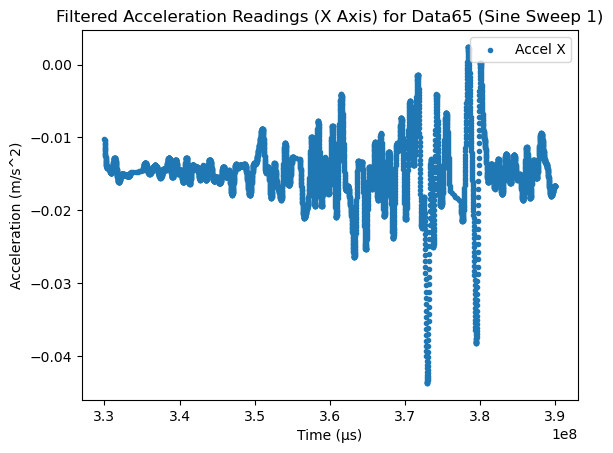

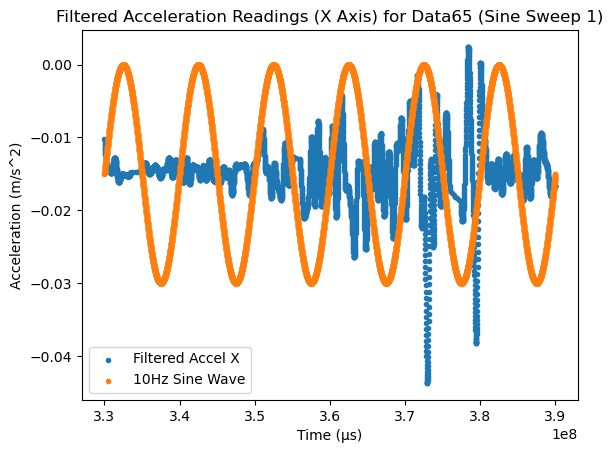

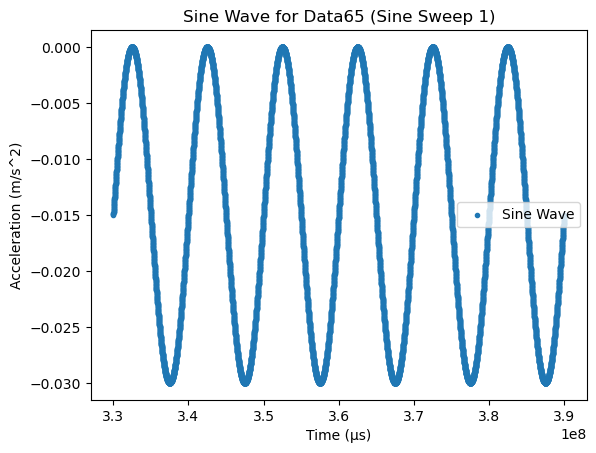

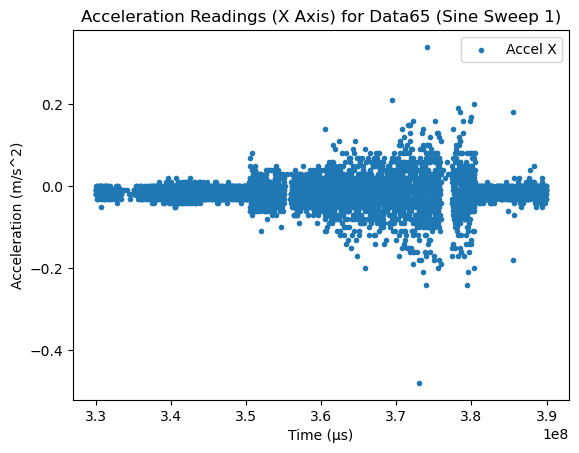

In [10]:
#Ok so now we need to filter the high frequency noise from the imu data
# We will use a butterworth filter
# We will use a 6th order filter
# We will use a cutoff frequency of 50 Hz
# We will use a sampling frequency of 1500 Hz to get above the nyquist frequency

#Lets import the scipy signal library
import scipy.signal


# We will start by creating the filter
# First we need to define the sampling frequency
fs = 1500
# Next we need to define the cutoff frequency
fc = 20
# Next we need to define the order of the filter
order = 6
# Next we will calculate the normalized cutoff frequency
w = fc / (fs / 2)
# Next we will calculate the b and a coefficients for the filter
b, a = scipy.signal.butter(order, w, 'low')
#Frequency of the comparison sine wave
fz = 10

# Now we will filter the data
# We will start by filtering the accel data
# We will start by filtering the accel data in the x direction for sine sweep 1
# First we will create a new dataframe to hold the filtered data
imuDataSineSweep1Filtered = imuDataSineSweep1
# Next we will filter the data
imuDataSineSweep1Filtered['AccelXFiltered'] = scipy.signal.filtfilt(b, a, imuDataSineSweep1['AccelX'])
# Now we will plot the data
figIMUAccelXSineSweep1Filtered, axIMUAccelXSineSweep1Filtered = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep1Filtered = axIMUAccelXSineSweep1Filtered.scatter(imuDataSineSweep1Filtered['Time'], imuDataSineSweep1Filtered['AccelXFiltered'], label='Accel X', marker=".")
#add axis titles
axIMUAccelXSineSweep1Filtered.set_xlabel('Time (µs)')
axIMUAccelXSineSweep1Filtered.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep1Filtered.set_title('Filtered Acceleration Readings (X Axis) for ' + dataSet + ' (Sine Sweep 1)')
axIMUAccelXSineSweep1Filtered.legend()

#lets plot a pure sine wave of amplitude 0.03 m/s^2 and frequency 10 Hz
#First we need to create a time array starting at 3.3e8 and ending at 3.9e8 micro seconds with 100000 points
timeArray = np.linspace(3.3e8, 3.9e8, 10000)
#Next we need to create a sine wave centered at -0.015 m/s^2 with amplitude 0.03 m/s^2 and frequency 10 Hz
sineWave = 0.015 * np.sin(2 * np.pi * fz * timeArray) - 0.015
#Now we will plot the sine wave and the filtered data on the same plot
figIMUAccelXSineSweep1FilteredSineWave, axIMUAccelXSineSweep1FilteredSineWave = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep1FilteredSineWave = axIMUAccelXSineSweep1FilteredSineWave.scatter(imuDataSineSweep1Filtered['Time'], imuDataSineSweep1Filtered['AccelXFiltered'], label='Filtered Accel X', marker=".")

plotIMUAccelXSineSweep1FilteredSineWave = axIMUAccelXSineSweep1FilteredSineWave.scatter(timeArray, sineWave, label= str(fz) + 'Hz Sine Wave', marker=".")
#add axis titles
axIMUAccelXSineSweep1FilteredSineWave.set_xlabel('Time (µs)')
axIMUAccelXSineSweep1FilteredSineWave.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep1FilteredSineWave.set_title('Filtered Acceleration Readings (X Axis) for ' + dataSet + ' (Sine Sweep 1)')
axIMUAccelXSineSweep1FilteredSineWave.legend()


# Lets just plot the sine wave we generated in a new plot
figIMUAccelXSineSweep1SineWave, axIMUAccelXSineSweep1SineWave = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep1SineWave = axIMUAccelXSineSweep1SineWave.scatter(timeArray, sineWave, label='Sine Wave', marker=".")
#add axis titles
axIMUAccelXSineSweep1SineWave.set_xlabel('Time (µs)')
axIMUAccelXSineSweep1SineWave.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep1SineWave.set_title('Sine Wave for ' + dataSet + ' (Sine Sweep 1)')
axIMUAccelXSineSweep1SineWave.legend()



#Lets replot figIMUAccelXSineSweep1 into a new figure
figIMUAccelXSineSweep1, axIMUAccelXSineSweep1 = plt.subplots()   # Create a figure containing a single axes.
plotIMUAccelXSineSweep1 = axIMUAccelXSineSweep1.scatter(imuDataSineSweep1['Time'], imuDataSineSweep1['AccelX'], label='Accel X', marker=".")
#add axis titles
axIMUAccelXSineSweep1.set_xlabel('Time (µs)')
axIMUAccelXSineSweep1.set_ylabel('Acceleration (m/s^2)')
axIMUAccelXSineSweep1.set_title('Acceleration Readings (X Axis) for ' + dataSet + ' (Sine Sweep 1)')
axIMUAccelXSineSweep1.legend()






